# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
pwd

'C:\\Users\\April Vilmin\\Desktop\\PyBer_Analysis'

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28:35,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [5]:
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

In [7]:
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
        "Total Rides" : ride_count,
        "Total Drivers" : driver_count,
        "Total Fares" : fare_total,
        "Average Fare per Ride" : avg_fare,
        "Average Fare per Driver" : avg_fare_per_driver})
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [13]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28:35,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05:47,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4.256850e+12,4,Rural


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#pyber_data_df.groupby(["type", "date"]).fare.sum().pyber_date_summary_df()
pyber_data_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]          
pyber_data_date_df

type   date               
Rural  2019-01-01 9:45:36     43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 3:31:26     24.88
       2019-01-06 7:38:40     47.33
                              ...  
Urban  2019-05-08 1:54:18     32.69
       2019-05-08 2:31:25     41.33
       2019-05-08 4:20:00     21.99
       2019-05-08 4:39:49     18.45
       2019-05-08 7:29:01     18.55
Name: fare, Length: 2375, dtype: float64

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_date_df = pyber_data_date_df.reset_index()

In [17]:
pyber_data_date_df

,type,date,fare
0,Rural,2019-01-01 9:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 3:31:26,24.88
4,Rural,2019-01-06 7:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 1:54:18,32.69
2371,Urban,2019-05-08 2:31:25,41.33
2372,Urban,2019-05-08 4:20:00,21.99
2373,Urban,2019-05-08 4:39:49,18.45


In [18]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# Assemble into DataFrame.
fare_date_pivot_df = pyber_data_date_df.pivot(index="date", columns="type", values="fare")
fare_date_pivot_df.tail()


type,Rural,Suburban,Urban
date,,,
2019-05-08 1:54:18,NaN,NaN,32.69
2019-05-08 2:31:25,NaN,NaN,41.33
2019-05-08 4:20:00,NaN,NaN,21.99
2019-05-08 4:39:49,NaN,NaN,18.45
2019-05-08 7:29:01,NaN,NaN,18.55


In [19]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates
fare_date_specific_pivot = fare_date_pivot_df.loc['2019-01-01':'2019-04-29']
fare_date_specific_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08:16,NaN,NaN,37.91
2019-01-01 0:46:46,NaN,47.74,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34:56,NaN,NaN,40.46
2019-04-28 8:15:09,NaN,NaN,22.86
2019-04-28 9:03:54,NaN,NaN,15.00


In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_date_pivot_df.index = pd.to_datetime(fare_date_pivot_df.index)

In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_date_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 07:29:01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_sum_df = fare_date_pivot_df.resample("w").sum()
weekly_fare_sum_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


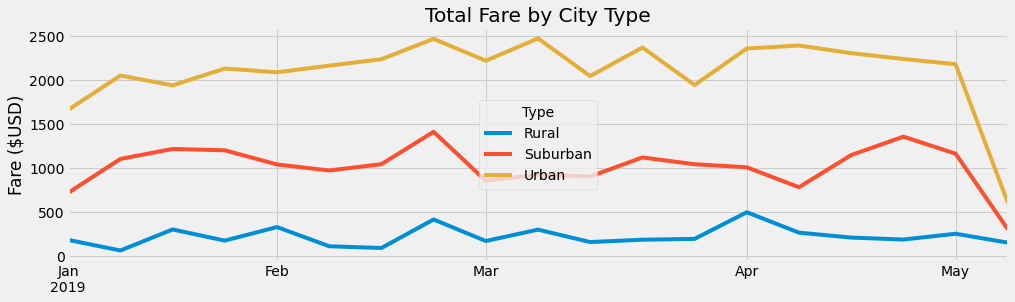

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# I had the graph plotted perfectly other than the fact I couldn't get the dates converted to months. I was debating using mdates or the datefromatter. I had looked at the following link, but it looked to easy: 
# https://www.dataquest.io/blog/making-538-plots/ 
# I decided to look at a classmates GitHub and discovered, it was even easier than I was making it. I had been overriding my x-axis label and causing my own issue. I copied code from the following:
# https://github.com/PopeScooby/PyBer_Analysis/blob/main/analysis/PyBer_Challenge.ipynb
type_date_by_week_line = weekly_fare_sum_df.plot(figsize = (15,4))
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("")
plt.legend(loc="center", title = "Type")
plt.savefig("PyBer_fare_summary.png")
plt.show()